# Proyecto cluster jerarquico
En entre proyecto podremo evidenciar como con un cluster jerarquico tipo aglomerativo podemos po 

## Descripcion general de base de datos
Este conjunto de datos incluye datos para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros

## Descripcion de variables
* Gender: Género del individuo (e.g., masculino o femenino).
* Age: Edad del individuo (en años).
* Height: Altura del individuo (probablemente en metros).
* Weight: Peso del individuo (probablemente en kilogramos).
* family_history_with_overweight: Indica si hay antecedentes familiares de sobrepeso (e.g., sí o no).
* FAVC: Frecuencia de consumo de alimentos con alto contenido calórico.
* FCVC: Frecuencia de consumo de verduras.
* NCP: Número de comidas principales que el individuo tiene por día.
* CAEC: Consumo de comida entre comidas (e.g., si come snacks).
* SMOKE: Indica si el individuo fuma (e.g., sí o no).
* CH2O: Consumo de agua diario (cantidad de veces al dia).
* SCC: Control de las calorías consumidas (e.g., sí o no).
* FAF: Frecuencia de actividad física por semana (e.g., número de días).
* TUE: Tiempo de uso de dispositivos electrónicos (como horas por día).
* CALC: Frecuencia de consumo de alcohol.
* MTRANS: Medio de transporte principal utilizado (e.g., caminando, en automóvil, bicicleta).
* NObeyesdad: Nivel de obesidad, que es la variable de clase, con valores como Peso Insuficiente, Peso Normal, Sobrepeso Nivel I y II, Obesidad Tipo I, II, y III.

## Objetivo principald del cluster 
¿El consumo de agua puede ser una estrategia efectiva para combatir la obesidad, incluso sin un control estricto de las calorías? Este estudio explorará la relación entre el volumen de agua ingerido diariamente y los niveles de obesidad, considerando si las personas llevan un registro de su consumo calórico.

## Proceso de exploracion
1. Importar las librerias que e uaran en el proyecto

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


2. Cargar y Explorar el Dataset

In [3]:
# Cargar el dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Información general
data.info()
data.head()

# Descripción estadística
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


De esta manera podemos ver una decripcion e interpretacion generar de las variable y su tipo, en este caso, solo nos enfocaremos en 3 de ellas segun el objetivo principal del analisis

3. Visualización de Variables Clave

In [4]:
# Distribución de CALC, SMOKE y NObeyesdad

df = data[['CH2O', 'SCC', 'NObeyesdad']]
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CH2O        2111 non-null   float64
 1   SCC         2111 non-null   object 
 2   NObeyesdad  2111 non-null   object 
dtypes: float64(1), object(2)
memory usage: 49.6+ KB


,CH2O,SCC,NObeyesdad
0,2.0,no,Normal_Weight
1,3.0,yes,Normal_Weight
2,2.0,no,Normal_Weight
3,2.0,no,Overweight_Level_I
4,2.0,no,Overweight_Level_II


Procedemos a convertir la variable SCC (si controla las calorias o no) en una variable tipo boolean para ser procesada

In [5]:
df['SCC'] = df['SCC'].map({'yes': True, 'no': False})

C:\Users\guerr\AppData\Local\Temp\ipykernel_31804\3145312020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCC'] = df['SCC'].map({'yes': True, 'no': False})


In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CH2O        2111 non-null   float64
 1   SCC         2111 non-null   bool   
 2   NObeyesdad  2111 non-null   object 
dtypes: bool(1), float64(1), object(1)
memory usage: 35.2+ KB


,CH2O,SCC,NObeyesdad
0,2.0,False,Normal_Weight
1,3.0,True,Normal_Weight
2,2.0,False,Normal_Weight
3,2.0,False,Overweight_Level_I
4,2.0,False,Overweight_Level_II


4. Limpieza y Preprocesamiento de Datos

In [7]:
# Normalización de datos
num_vars = ['CH2O']

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos numéricos
data_scaled = scaler.fit_transform(df[num_vars])

# Crear un nuevo DataFrame con los datos escalados
df_scaled = pd.DataFrame(data_scaled, columns=num_vars)

# Concatenar con la variable SCC (sin escalar)
df_scaled = pd.concat([df_scaled, df[['SCC', 'NObeyesdad']]], axis=1)

print(df_scaled.head())


       CH2O    SCC           NObeyesdad
0 -0.013073  False        Normal_Weight
1  1.618759   True        Normal_Weight
2 -0.013073  False        Normal_Weight
3 -0.013073  False   Overweight_Level_I
4 -0.013073  False  Overweight_Level_II


En este momento porcedemos a escalar la unica variable que tiene valore distintos ya que es la unica variable con variable numericas continuias que se eta usando (las otras dos son categoricas) la cual pueden llegar a ser un problema al momento de generar el modelo e incorporamos a un nuevo data, de esta manera descartamos valores atipico u outliers.

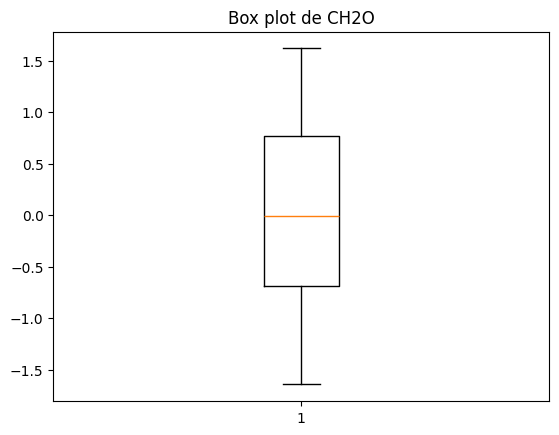

In [8]:
# Box plot para la variable CH2O
plt.boxplot(df_scaled['CH2O'])
plt.title('Box plot de CH2O')
plt.show()

5. Aplicación de Clúster Jerárquico

CH2O          float64
SCC              bool
NObeyesdad     object
dtype: object


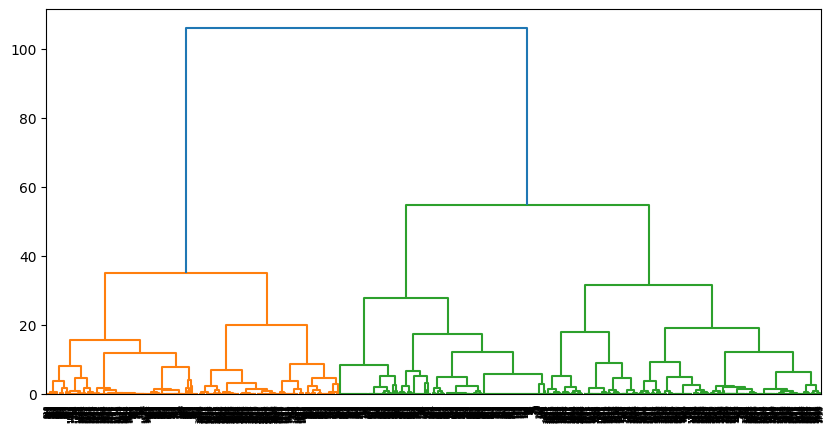

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram

# Suponiendo que tienes un DataFrame llamado df_scaled

# Identifica la columna con el problema (supongamos que es 'weight_category')
print(df_scaled.dtypes)  # Verifica los tipos de datos

# Codifica la columna con LabelEncoder
le = LabelEncoder()
df_scaled['NObeyesdad'] = le.fit_transform(df_scaled['NObeyesdad'])

# Aplica linkage a las columnas numéricas
Z = linkage(df_scaled, 'ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()


Podemos ver a simple vista una clara separacion de los datos y clusteres que se pueden llegar a generar co el modelo, en este casoe puede interpretar que 4 son la cantidad optima de clusteres para la data, procederemos a corroborar esta interpretacion con un diagrama de codo ya que es uno de los mejores metodos para encotrar el numeoro optimo

6. Interpretación de los Clústeres

c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\guerr\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


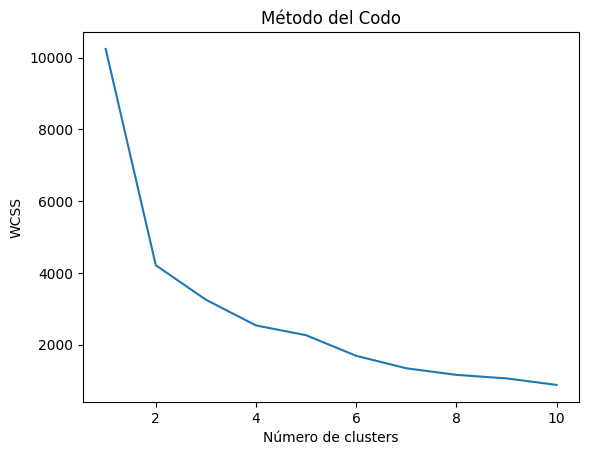

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suponiendo que tienes tus datos en un DataFrame llamado 'data'

# Lista para almacenar la inercia para cada valor de K
wcss = []

# Probar diferentes valores de K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

Segun podemos obervar, 4 e la cantidad optima de clussteres, usaremos este numero para incluirlo en la data y posteriormente poder interpretar su resultado

In [11]:

from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=4, criterion='maxclust')
df['Cluster'] = clusters
df

C:\Users\guerr\AppData\Local\Temp\ipykernel_31804\3882037677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


,CH2O,SCC,NObeyesdad,Cluster
0,2.000000,False,Normal_Weight,3
1,3.000000,True,Normal_Weight,3
2,2.000000,False,Normal_Weight,3
3,2.000000,False,Overweight_Level_I,1
4,2.000000,False,Overweight_Level_II,1
...,...,...,...,...
2106,1.728139,False,Obesity_Type_III,4
2107,2.005130,False,Obesity_Type_III,2
2108,2.054193,False,Obesity_Type_III,2
2109,2.852339,False,Obesity_Type_III,2


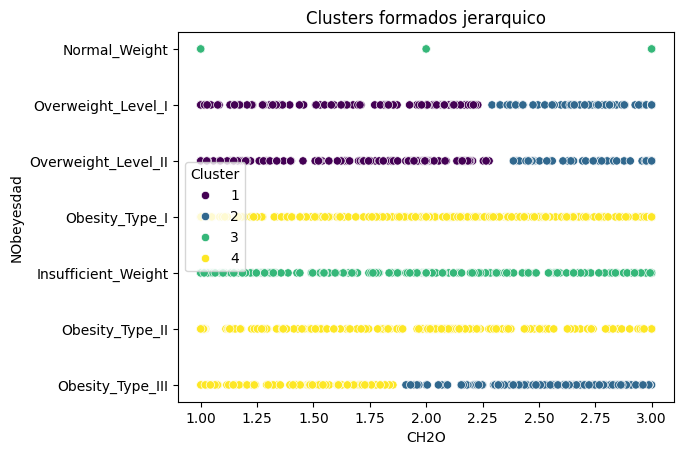

In [12]:
# Visualizar los clusters formados
sns.scatterplot(data=df, x='CH2O', y='NObeyesdad', hue='Cluster', palette='viridis')
plt.title('Clusters formados jerarquico')
plt.show()

Cluster
1    1.747594
2    2.669534
3    1.862479
4    1.921307
Name: CH2O, dtype: float64


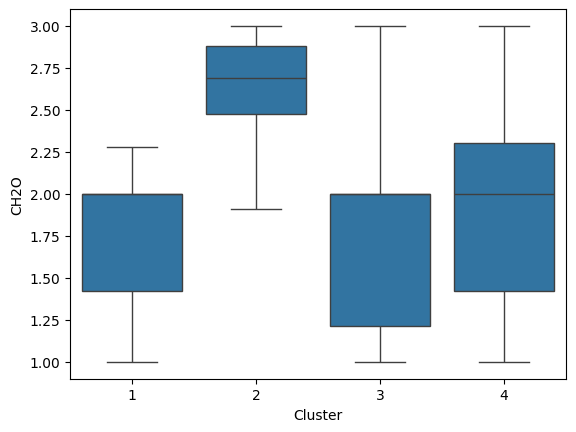

In [15]:
# Calcular la media de una variable numérica por cluster
mean_by_cluster = df.groupby('Cluster')['CH2O'].mean()
print(mean_by_cluster)

# Crear un gráfico de caja para comparar la distribución de una variable numérica entre clusters
sns.boxplot(x='Cluster', y='CH2O', data=df)
plt.show()

De esta manera ya nos podemos hacer una idea de la frecuencia con la cual las personas estan bebiendo agua a lo largho del dia, sin embargo, no nos dice si esto esta afectando o no en los niveles de obecidad. Algunas de las interpretacioness que podemo tener son: 
en el segundo cluster podemos evidenciar que la frecuenta con la que se bebe agua es mucho mayor que el reto de los clusteres
En el tercer cluster la frecuencia es mas baja con respecto a los demas, econtrandose los datos muy por debajo de la media en com,paracion al cluster 1
En el cuarto ya podemos evidencia que no es muy baja la freceuncia y que una buena parte de lo datos esta por encia de la media pero igual sigue la mapyor parte por debajo teniendo una poca frecuencia de conssumo

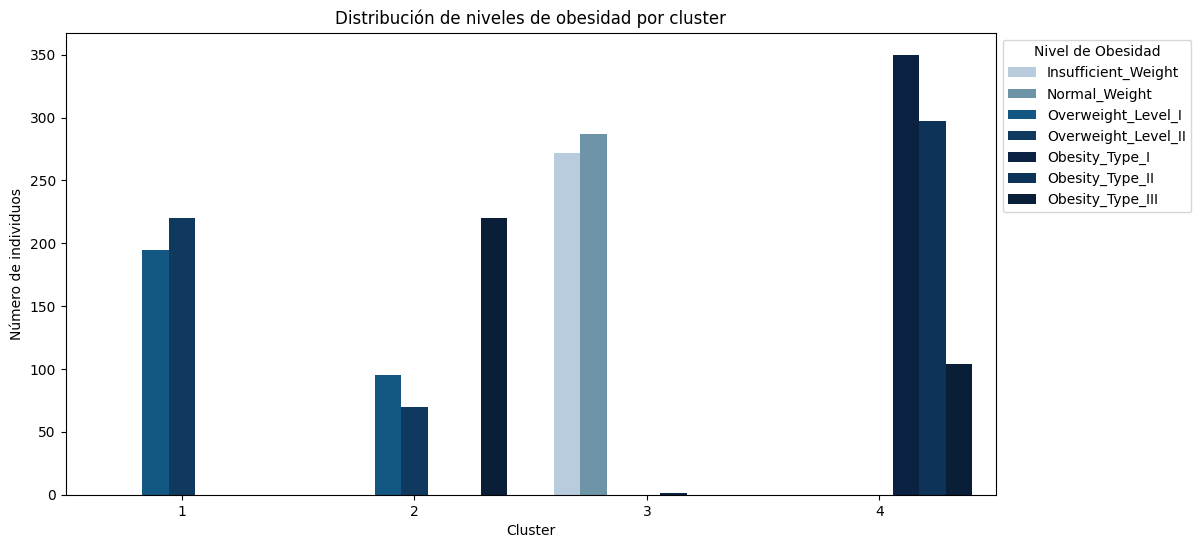

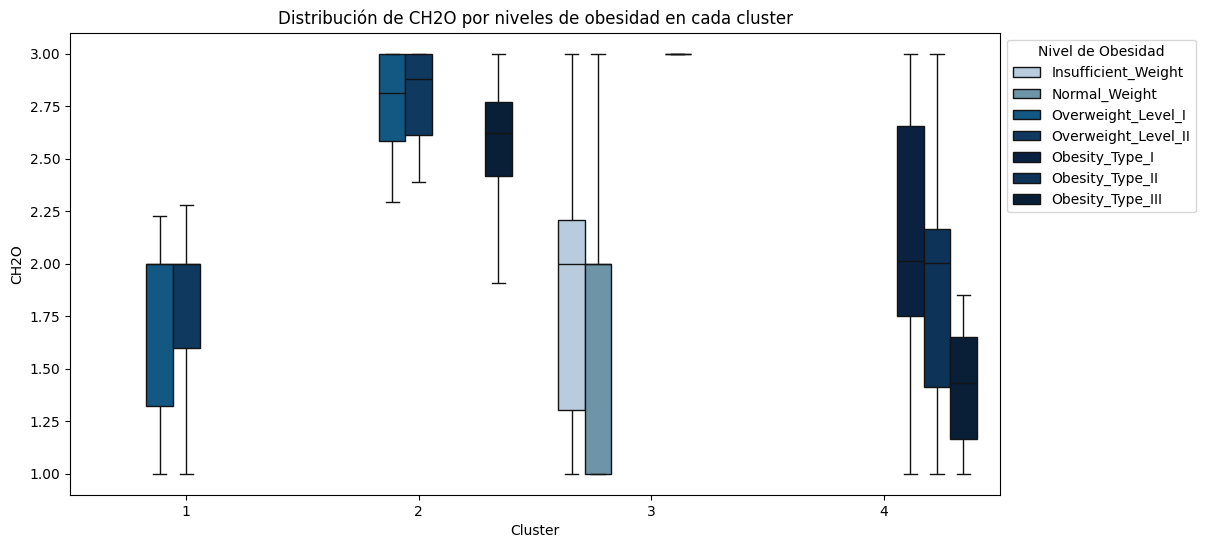

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verifica que el DataFrame `df` esté bien estructurado
# print(df.head())  # Descomenta esta línea para ver la estructura de df y verificar las columnas

# Paleta de colores personalizada para los niveles de obesidad (de claro a oscuro)
palette = {
    'Insufficient_Weight': '#b3cde3',   # Color claro para nivel bajo
    'Normal_Weight': '#6497b1',
    'Overweight_Level_I': '#005b96',
    'Overweight_Level_II': '#03396c',
    'Obesity_Type_I': '#011f4b',
    'Obesity_Type_II': '#003366',
    'Obesity_Type_III': '#001f3f'       # Color oscuro para nivel más alto
}

# Gráfico de barras apiladas para la obesidad por cluster
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='NObeyesdad', data=df, palette=palette, hue_order=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.ylabel('Número de individuos')
plt.xlabel('Cluster')
plt.title('Distribución de niveles de obesidad por cluster')
plt.legend(title='Nivel de Obesidad', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Boxplots de CH2O por nivel de obesidad dentro de cada cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='CH2O', hue='NObeyesdad', data=df, palette=palette, hue_order=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.ylabel('CH2O')
plt.xlabel('Cluster')
plt.title('Distribución de CH2O por niveles de obesidad en cada cluster')
plt.legend(title='Nivel de Obesidad', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Al comparar la frecuencia de consumo de agua con los niveles de obesidad en los diferentes clusters, hemos encontrado que el consumo de agua por sí solo no es un predictor confiable de la obesidad. Observamos que tanto clusters con un alto consumo de agua (cluster 2) como aquellos con un bajo consumo (cluster 1) presentaron altos índices de obesidad. Esto sugiere que otros factores, como la dieta en general y la actividad física, desempeñan un papel más determinante en el desarrollo de la obesidad. Los clusters 3 y 4, por su parte, mostraron una relación más compleja, indicando que el consumo de agua podría ser un factor contribuyente, pero no el único.

Cluster
1    0.086747
2    0.012987
3    0.094643
4    0.002663
Name: SCC, dtype: float64


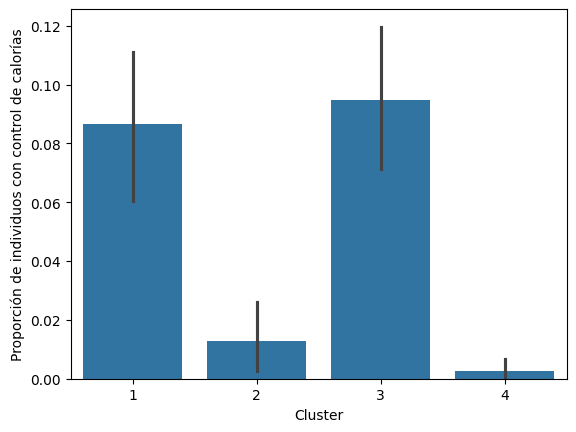

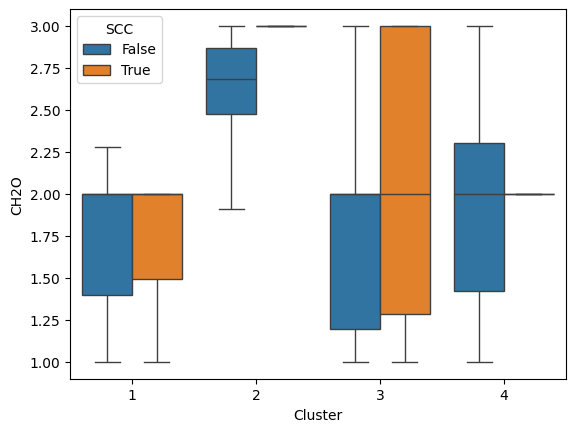

In [17]:
# Calcular la proporción de individuos que llevan control de calorías en cada cluster
proportion_scc_by_cluster = df.groupby('Cluster')['SCC'].mean()
print(proportion_scc_by_cluster)

# Crear un gráfico de barras para visualizar la proporción
sns.barplot(x='Cluster', y='SCC', data=df)
plt.ylabel('Proporción de individuos con control de calorías')
plt.show()

# Crear boxplots separados para CH2O según el control de calorías
sns.boxplot(x='Cluster', y='CH2O', hue='SCC', data=df)
plt.show()


De esto podemos interpretar que clusteres como el tercero y el primero tienen una alta tendencia a controlar la cantidad de calorias que consumen, a diferencia de el segundo y cuarto cluter que no lo controlan para nada.

## Conclusion
Al analizar la relación entre el consumo de agua, el control de calorías y los niveles de obesidad en los diferentes clusters, hemos encontrado que un mayor consumo de agua no garantiza una reducción en los índices de obesidad. Por ejemplo, en el cluster 1, a pesar de un bajo consumo de agua, se observaron altos niveles de obesidad debido a un estricto control calórico. Por otro lado, en el cluster 2, un elevado consumo de agua no se tradujo en una disminución de la obesidad, posiblemente debido a un descontrol en la ingesta calórica. En contraste, los clusters 3 y 4 mostraron niveles de obesidad más bajos, lo cual podría estar relacionado con una combinación de un control moderado de calorías y un consumo de agua adecuado.